In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

%matplotlib inline

In [3]:
class Vector:
    X=float()
    Y=float()
    def __init__(self, x, y):
        self.X = x
        self.Y = y

def Pn(q, n):
    result = 1.0
    for i in range(n):
        result *= (q - float(i))
    return result / math.factorial(n)

def diffMatrix(points):
    diff = list(list())
    diff.append(list())
    for i in range(len(points)): 
        diff[0].append(points[i].Y)
    remainingCount = len(diff[0]) - 1
    while remainingCount > 0:
        remainingCount-=1
        last = diff[len(diff)-1]
        currentDiff =list()
        for i in range(len(last)-1):
            currentDiff.append(last[i+1]-last[i])
        diff.append(currentDiff)
    return diff

def SupportNewtonFunction(points,diff, x, h):
    result = 0.0
    q = (x - points[0].X) / h
    result += points[0].Y
    for j in range(1, len(diff)):
        result += diff[j][0] * Pn(q, j)
    return result 

def NewtonPolynom(points):
    diff = diffMatrix(points)
    h = points[1].X - points[0].X
    #minimum, maximum, function
    return 1, 2.05, lambda x: SupportNewtonFunction(points, diff, x, h = h)

In [4]:
def Li(points, i, x):
    result = 1.0
    for j in range(len(points)):
        if j==i:
            continue
        result *= x - points[j].X
    return result
def Si(points, i, x):
    return points[i].Y * Li(points, i, x) / Li(points, i, points[i].X)
def SupportLagrangeFunction(points, x):
    result = 0.0
    for j in range(len(points)):
        result += Si(points, j, x)
    return result
def LagrangePolynom(points):
    return 1, 2, lambda x: SupportLagrangeFunction(points, x)

In [5]:
def createSeries(n):
    result = list()
    for i in range(n):
        x = 1.0 + float(i) / (n-1)
        y = math.log(x)
        result.append(Vector(x, y))
    return result

In [6]:
n = 10
series = createSeries(n)

# Для полинома Ньютона

In [7]:
newton_polynomian = NewtonPolynom(series)

In [8]:
values=list()
for i in range(105):
    values.append(float(i+100)/100.0)
log_values=list()
for i in range(105):
    log_values.append(math.log(values[i]))

In [9]:
newton_val = list()
for i in range(len(values)):
    newton_val.append(newton_polynomian[2](values[i]))

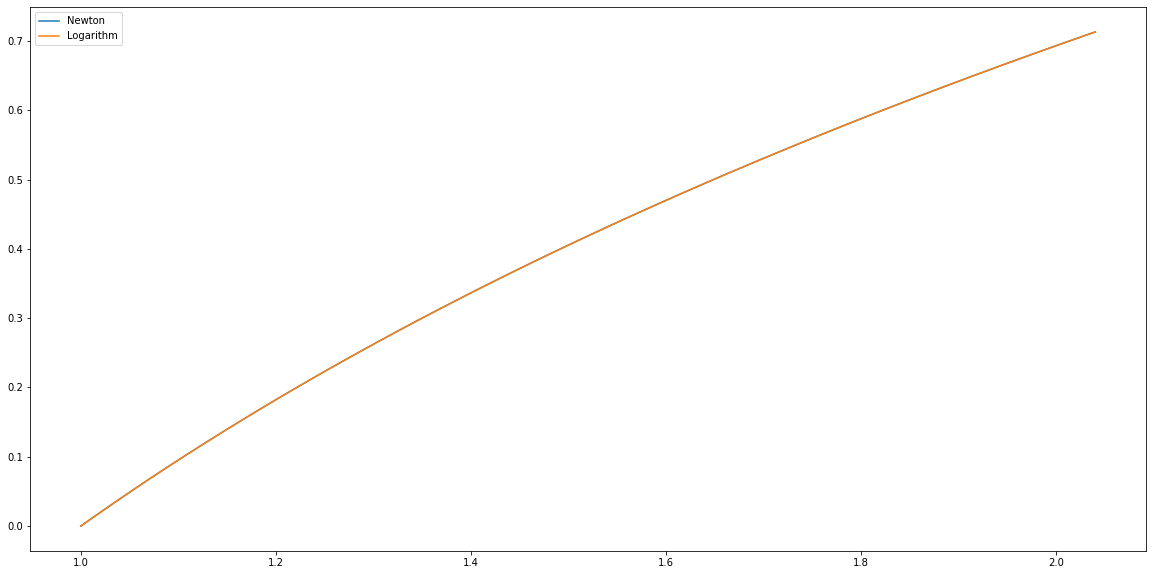

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(values, newton_val, label = 'Newton')
ax.plot(values, log_values, label = 'Logarithm')
ax.legend()

In [11]:
log_x_newton=list()
for i in range(len(values)):
    log_x_newton.append(newton_val[i] - math.log(values[i]))

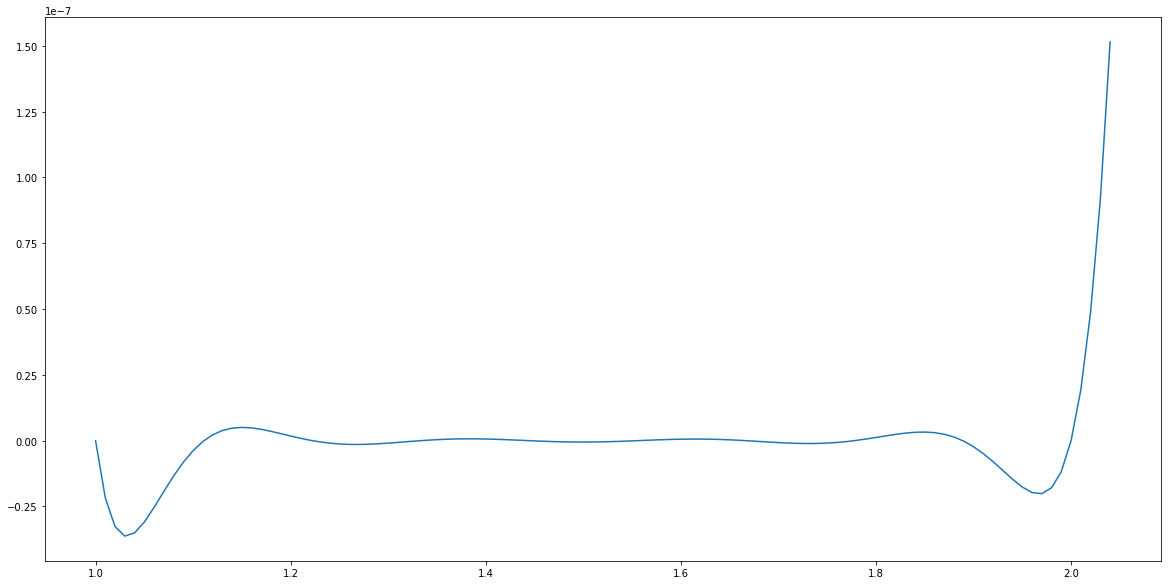

In [12]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(values, log_x_newton)

# Для полинома Лагранжа

In [74]:
lagrange_polynomian =LagrangePolynom(series) 

In [75]:
lagrange_val = list()
for i in range(len(values)):
    lagrange_val.append(lagrange_polynomian[2](values[i]))

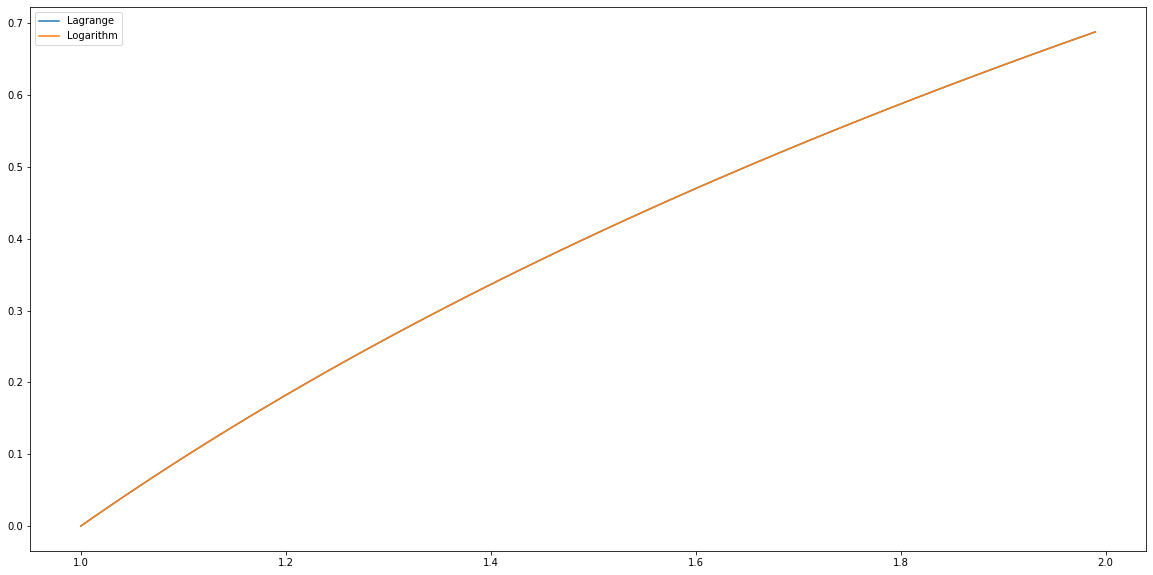

In [76]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(values, lagrange_val, label = 'Lagrange')
ax.plot(values, log_values, label = 'Logarithm')
ax.legend()

In [77]:
log_x_lagrange=list()
for i in range(len(values)):
    log_x_lagrange.append(lagrange_val[i] - math.log(values[i]))

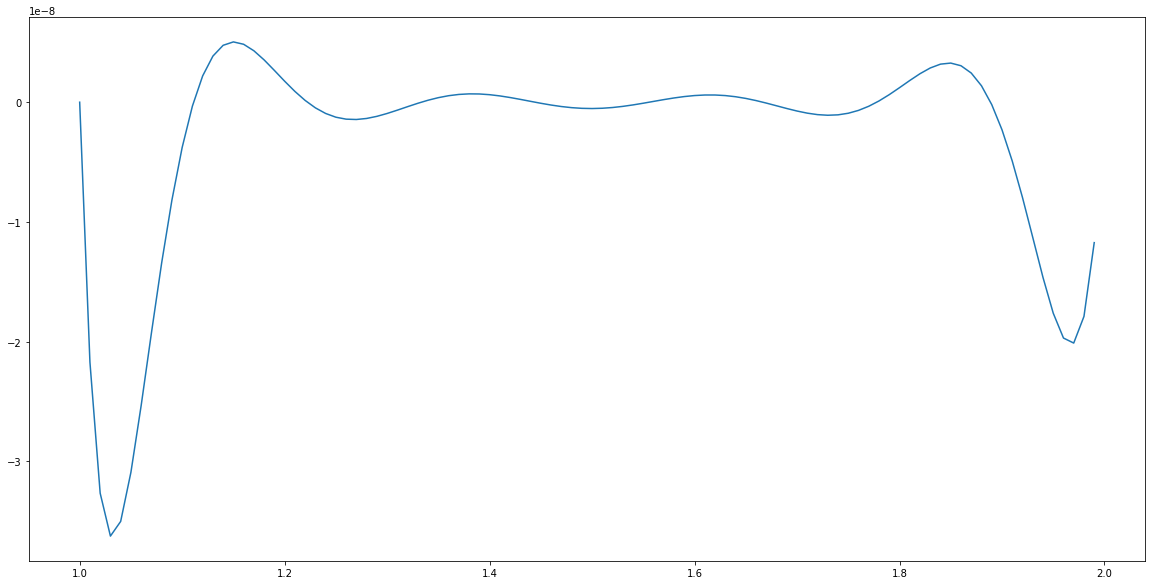

In [78]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(values, log_x_lagrange)

# Сравнение Ньютона и Лагранжа

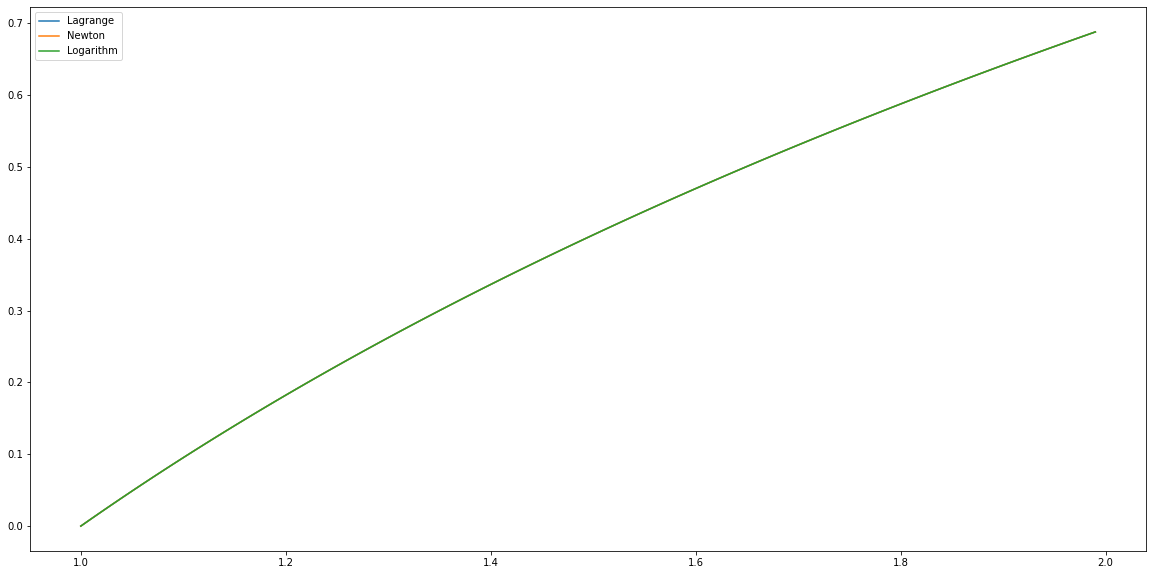

In [79]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(values, lagrange_val, label = 'Lagrange')
ax.plot(values, newton_val, label = 'Newton')
ax.plot(values, log_values, label = 'Logarithm')
ax.legend()

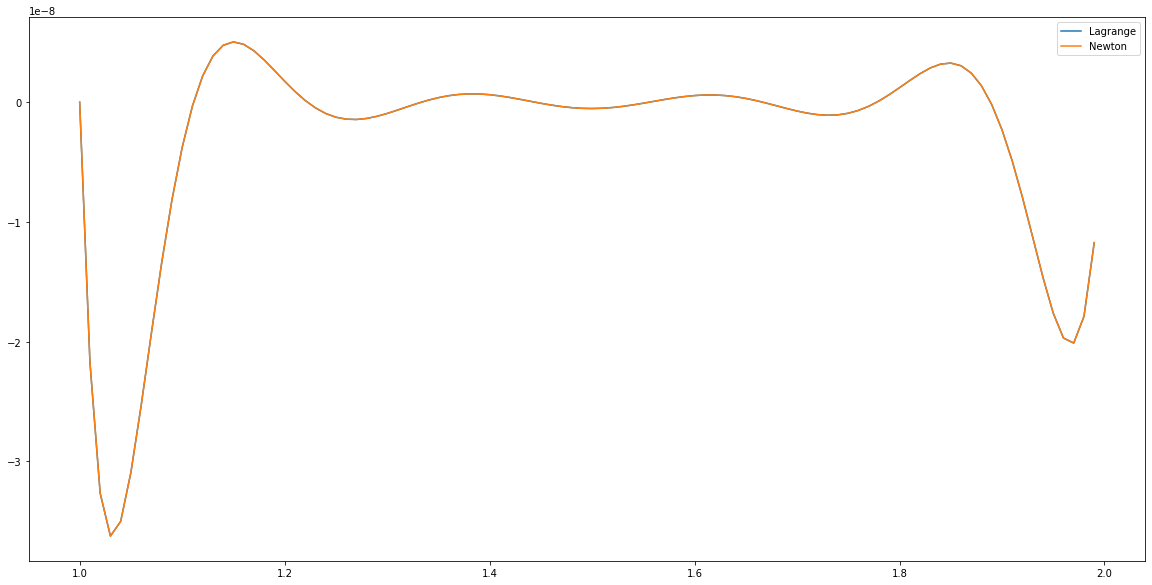

In [80]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(values, log_x_lagrange, label = 'Lagrange')
ax.plot(values, log_x_newton, label = 'Newton')
ax.legend()